In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

c:\Users\math\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df=pd.read_csv("biodeg.csv",sep=";")

In [3]:
df.head()

SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  nCb-    C%  nCp  nO  \
0    3.919   2.6909    0         0         0       0     0  31.4    2   0   
1    4.170   2.1144    0         0         0       0     0  30.8    1   1   
2    3.932   3.2512    0         0         0       0     0  26.7    2   4   
3    3.000   2.7098    0         0         0       0     0  20.0    0   2   
4    4.236   3.3944    0         0         0       0     0  29.4    2   4   

   ...  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  SM6_B(m)  nArCOOR  nX  \
0  ...         0      0       2.949    1.591   0     7.253        0   0   
1  ...         0      0       3.315    1.967   0     7.257        0   0   
2  ...         0      1       3.076    2.417   0     7.601        0   0   
3  ...         0      1       3.046    5.000   0     6.690        0   0   
4  ...         0      0       3.351    2.405   0     8.003        0   0   

   experimental class  Unnamed: 42  
0                  RB          NaN  
1                  RB          NaN  
2                  RB          NaN  
3                  RB          NaN  
4                  RB          NaN  

[5 rows x 43 columns]

In [4]:
df=df.drop(columns="Unnamed: 42")

In [5]:
df.shape

(1055, 42)

In [6]:
df.isnull().sum()

SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                    0
experimental cla

In [7]:
df["experimental class"].loc[df["experimental class"]=='RB']=1
df["experimental class"].loc[df["experimental class"]=='NRB']=0

<ipython-input-7-b4fb0b0197f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["experimental class"].loc[df["experimental class"]=='RB']=1
<ipython-input-7-b4fb0b0197f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["experimental class"].loc[df["experimental class"]=='NRB']=0


In [8]:
Y=df["experimental class"]
X=df.drop("experimental class",axis=1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [13]:
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y_train)
ytst=label_encoder.fit_transform(y_test)

RandomForestClassification

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [i for i in range (1,100)],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_encoded)


# Essayez de faire des prédictions
#y_pred_rf = rf_model.predict(X_test)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [47]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
"{'criterion': 'entropy', 'n_estimators': 90} 0.8672936038320653"
print(best_params)

{'criterion': 'entropy', 'n_estimators': 74}


In [39]:
n_estimators = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_train)

for k in n_estimators:
    mod = RandomForestClassifier(criterion= 'entropy', n_estimators=k)
    score = cross_val_score(mod, X, y_encoded, cv=5)
    scores.append(np.mean(score))

Text(0.5, 1.0, 'research for best n value')

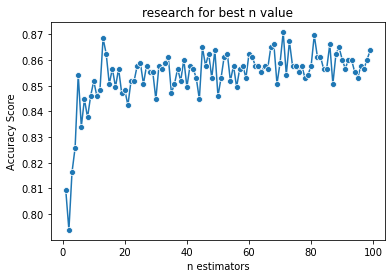

In [40]:
sns.lineplot(x = n_estimators, y = scores, marker = 'o')
plt.xlabel("n estimators")
plt.ylabel("Accuracy Score")
plt.title("research for best n value")

In [48]:
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_encoded)

RandomForestClassifier(criterion='entropy', n_estimators=74)

In [49]:
y_pred=best_model.predict(X_test)

0.3510309798510181
0.8450704225352113 0.8 0.821917808219178
0.8767772511848341


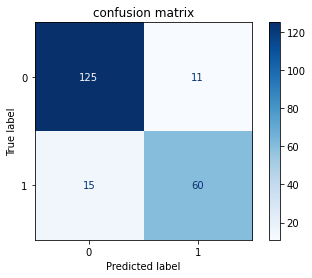

In [50]:
conf=confusion_matrix(ytst, y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_model.classes_)
precision = precision_score(ytst, y_pred)
recall = recall_score(ytst, y_pred)
f1 = f1_score(ytst, y_pred)
accuracy = accuracy_score(ytst, y_pred)
rmse = mean_squared_error(ytst, y_pred, squared=False)
print(rmse)
print(precision,recall,f1)
print(accuracy)
vis.plot(cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.show()

SVC

In [ ]:
from sklearn import svm

svm_model=svm.SVC(random_state=30)
param_svm = {
    'C': [i for i in range(0,51)],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale','auto','rbf'],
    'degree':[i for i in range(1,11)]
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_svm, cv=4)



In [ ]:
grid_search.fit(X_train, y_encoded) 

KeyboardInterrupt: 

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
"{'C': 36, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}"
print(best_params)

{'C': 1, 'degree': 0, 'gamma': 'auto', 'kernel': 'poly'}


Text(0.5, 1.0, 'research for best C value')

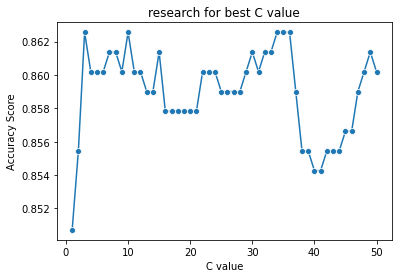

In [ ]:
C_value = [i for i in range (1,51)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_train)

for k in C_value:
    mod = svm.SVC(C=k, degree=1, gamma='auto', kernel='poly')
    score = cross_val_score(mod, X, y_encoded, cv=4)
    scores.append(np.mean(score))

sns.lineplot(x = C_value, y = scores, marker = 'o')
plt.xlabel("C value")
plt.ylabel("Accuracy Score")
plt.title("research for best C value")

In [ ]:
best_model_svm = svm.SVC(C= 36, degree= 1, gamma= 'auto', kernel= 'poly')#**best_params)
best_model_svm.fit(X_train, y_encoded)
y_pred=best_model_svm.predict(X_test)

0.36428206351802156
0.7831325301204819 0.8666666666666667 0.8227848101265823
0.8672985781990521


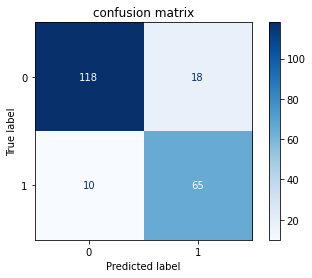

In [ ]:
#cmap=plt.cm.Blues
conf=confusion_matrix(ytst, y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_model_svm.classes_)
precision = precision_score(ytst, y_pred)
recall = recall_score(ytst, y_pred)
f1 = f1_score(ytst, y_pred)
accuracy = accuracy_score(ytst, y_pred)
rmse = mean_squared_error(ytst, y_pred, squared=False)
print(rmse)
print(precision,recall,f1)
print(accuracy)
vis.plot(cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.show()

Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=30)
param_log={
    'penalty':['l1', 'l2', 'elasticnet', None],
    'tol':[i/10 for i in range(11)],
    'C':[i for i in range(1,51)],
    
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
grid_searchLR = GridSearchCV(estimator=LR, param_grid=param_log, cv=4)

In [16]:
grid_searchLR.fit(X_train, y_encoded)

c:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=30),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'penalty': ['l2'], 'solver': ['lbfgs'],
                         'tol': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                 0.9, 1.0]})

In [17]:
best_params = grid_searchLR.best_params_
best_score = grid_searchLR.best_score_

In [20]:
print(best_params)


{'C': 23, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0}


best scores:{'C': 23, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0}

c:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Text(0.5, 1.0, 'research for best C value')

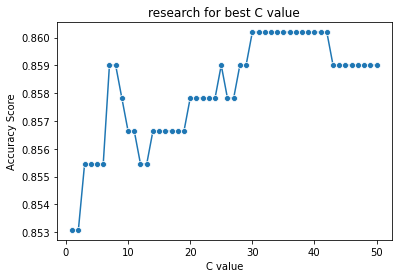

In [28]:
C_value = [i for i in range (1,51)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_train)

for k in C_value:
    mod = LogisticRegression(C=k, penalty='l2', solver='lbfgs', tol=0.0)
    score = cross_val_score(mod, X, y_encoded, cv=4)
    scores.append(np.mean(score))

sns.lineplot(x = C_value, y = scores, marker = 'o')
plt.xlabel("C value")
plt.ylabel("Accuracy Score")
plt.title("research for best C value")

In [26]:
best_modelLR = LogisticRegression(C= 35, penalty= 'l2', solver= 'lbfgs', tol= 0)#**best_params)
best_modelLR.fit(X_train, y_encoded)
y_pred=best_modelLR.predict(X_test)

c:\Users\math\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_matrix(y_pred,ytst)

array([[117,  12],
       [ 19,  63]], dtype=int64)

0.3770677588799258
0.7710843373493976 0.8533333333333334 0.8101265822784811
0.8578199052132701


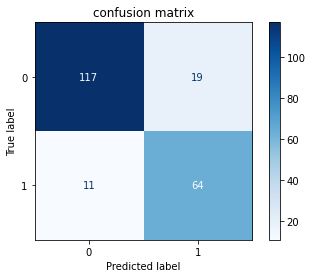

In [29]:
conf=confusion_matrix(ytst, y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_modelLR.classes_)
precision = precision_score(ytst, y_pred)
recall = recall_score(ytst, y_pred)
f1 = f1_score(ytst, y_pred)
accuracy = accuracy_score(ytst, y_pred)
rmse = mean_squared_error(ytst, y_pred, squared=False)
print(rmse)
print(precision,recall,f1)
print(accuracy)
vis.plot(cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.show()

KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KN=KNeighborsClassifier()
param_kn={
    'n_neighbors':[5,7,8,9,10,13],
    'weights':['uniform','distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[0,1,2,3,4,5,7,8,9,10,11,12,13,15,17,20,30],
    
}
grid_searchKN = GridSearchCV(estimator=KN, param_grid=param_kn, cv=4)

In [ ]:
grid_searchKN.fit(X_train, y_encoded)

c:\Users\math\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\math\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\math\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\math\anaconda3\lib\site-packages\sklearn\base.py", line 706, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\math\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 266, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "c:\Users\math\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 822, in kneighbors
    results = ArgKmin.co

KeyboardInterrupt: 

In [ ]:
best_params = grid_searchKN.best_params_
best_score = grid_searchKN.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print(best_params,best_score)
"{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'} 0.7997630331753555"

{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'} 0.7997630331753555


In [32]:
best_params={'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'}

In [33]:
best_modelKL = KNeighborsClassifier(**best_params)
best_modelKL.fit(X_train, y_encoded)
y_pred=best_modelKL.predict(X_test)

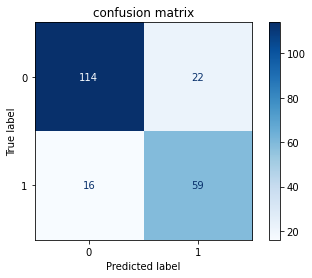

In [34]:
conf=confusion_matrix(ytst,y_pred)
vis = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=best_modelKL.classes_)
vis.plot(cmap=plt.cm.Blues)
plt.title("confusion matrix")
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_train)

for k in k_values:
    knn = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 1, n_neighbors= k, weights= 'uniform')
    score = cross_val_score(knn, X, y_encoded, cv=5)
    scores.append(np.mean(score))

Text(0.5, 1.0, 'researche for best K value')

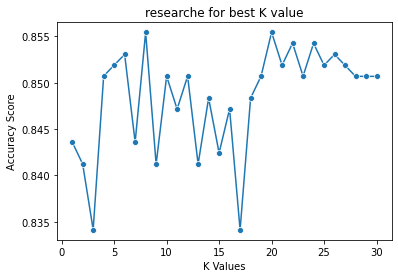

In [37]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("researche for best K value")

In [ ]:
precision = precision_score(ytst, y_pred)
recall = recall_score(ytst, y_pred)
f1 = f1_score(ytst, y_pred)
accuracy = accuracy_score(ytst, y_pred)
rmse = mean_squared_error(ytst, y_pred, squared=False)
print(rmse)
print(precision,recall,f1)
print(accuracy)

0.42437576124215415
0.7283950617283951 0.7866666666666666 0.7564102564102564
0.8199052132701422
